In [1]:
%matplotlib inline

import json
import glob
import re
import itertools
import functools

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

mpl.rc('font', family='Arial', size=12)

In [3]:
regions = pd.read_hdf('region_data.hdf')

In [4]:
regions.head()

,ucsc_name,distance_from_tss,value,speed_compared_to_avg,est_time,z_score,chr,start,end,strand,region_start,region_end
15,chr10:118297929-118342320;-,7.5,0.258502,ns,37.938144,0.724711,chr10,118297929,118342320,-,118334320,118334820
16,chr10:118297929-118342320;-,8.0,0.187937,ns,37.800687,0.022173,chr10,118297929,118342320,-,118333820,118334320
17,chr10:118297929-118342320;-,8.5,0.104001,ns,37.663230,-0.813502,chr10,118297929,118342320,-,118333320,118333820
18,chr10:118297929-118342320;-,9.0,0.059831,faster,37.525773,-1.253261,chr10,118297929,118342320,-,118332820,118333320
19,chr10:118297929-118342320;-,9.5,0.343333,slower,37.388316,2.608990,chr10,118297929,118342320,-,118332320,118332820


In [18]:
regions['gene_length'] = (regions.end - regions.start)

In [22]:
regions['pct_through'] = regions.distance_from_tss / (regions.gene_length / 1e3)

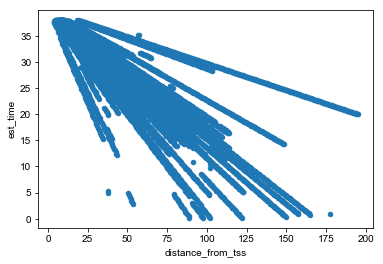

In [6]:
regions.plot.scatter('distance_from_tss', 'est_time')

In [24]:
regions.groupby('speed_compared_to_avg').pct_through.mean()

speed_compared_to_avg
faster    0.523710
ns        0.600088
slower    0.598552
Name: pct_through, dtype: float64

In [25]:
stats.kruskal(regions.loc[regions.speed_compared_to_avg == 'slower', 'pct_through'], 
              regions.loc[regions.speed_compared_to_avg == 'ns', 'pct_through'], 
              regions.loc[regions.speed_compared_to_avg == 'faster', 'pct_through'])

KruskalResult(statistic=128.39955180623355, pvalue=1.3133835904064363e-28)

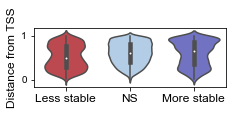

In [26]:
fig,ax = plt.subplots(figsize=(3.5,1.5))
sns.violinplot(
 x = 'speed_compared_to_avg',
 y = 'pct_through',
 data = regions,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf'],
 ax=ax
)
ax.set_ylabel('Distance from TSS', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(['Less stable', 'NS', 'More stable'], fontsize=12)
fig.tight_layout()
fig.savefig('Correlation_to_position.svg', transparent=True)

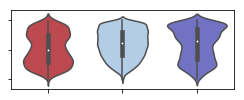

In [28]:
fig,ax = plt.subplots(figsize=(3.5,1.5))
sns.violinplot(
 x = 'speed_compared_to_avg',
 y = 'pct_through',
 data = regions,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf'],
 ax=ax
)
ax.set_ylabel('', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(['', '', ''], fontsize=12)
ax.set_yticklabels('')
fig.tight_layout()
fig.savefig('Correlation_to_position_nolabel.svg', transparent=True)

In [16]:
!echo $(whoami)@$HOSTNAME:$(pwd)

cimprich@cimprichserver.stanford.edu:/Volumes/Pegasus/DRIP_spike_in/qdrip/notebooks/lifetimes
